# 2量子ビット回路と測定
次は、2量子ビット回路で実験してみます。
$H$ゲートをそれぞれの量子ビットに実行してみましょう。

In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.0',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.18.0'}

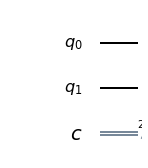

In [3]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2)    # ２量子ビット回路と２ビットの古典レジスターを用意します。

# 回路を描画
q.draw(output="mpl")

$H$ゲートをそれぞれの量子ビットに実行してみます。

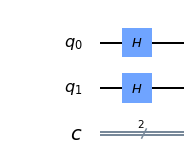

In [4]:
# 量子ゲートで回路を作成
q.h(0)   # Hゲートを量子ビットq0に実行します。
q.h(1)   # Hゲートを量子ビットq1に実行します。
# q.h([0,1])    # またはこのように書くこともできます。

# 回路を描画
q.draw(output="mpl")

状態ベクトルシミュレーターを使って計算してみます。

In [5]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


この結果は、どういう意味でしょうか？

２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$


$=\frac{1}{2}(\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
\otimes
\begin{pmatrix}
1 \\\
1
\end{pmatrix} )
=
\frac{1}{2}\begin{pmatrix}
1 \\\
1 \\\
1 \\\
1
\end{pmatrix} 
=
\frac{1}{2}(\begin{pmatrix}
1 \\\
0 \\\
0 \\\
0
\end{pmatrix} +\begin{pmatrix}
0 \\\
1 \\\
0 \\\
0
\end{pmatrix} +\begin{pmatrix}
0 \\\
0 \\\
1 \\\
0
\end{pmatrix} +\begin{pmatrix}
0 \\\
0 \\\
0 \\\
1
\end{pmatrix} 
)$ 


次に、この状態を測定してみましょう。

まず、測定回路を追加します。

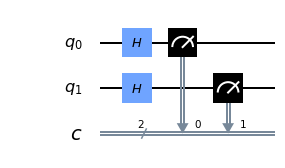

In [6]:
# 回路を測定
q.measure(0,0)
q.measure(1,1)

# 回路を描画
q.draw(output='mpl')

次にQASMシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

{'00': 248, '01': 239, '11': 282, '10': 255}


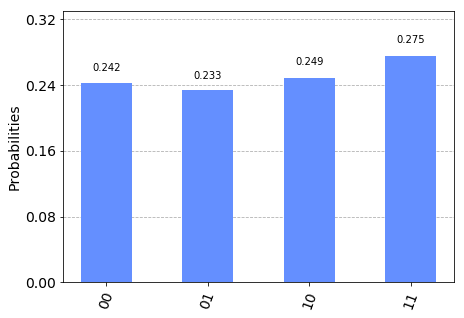

In [7]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q)
print(counts)

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

## 演習2
次の回路をプログラミングし、状態ベクトルシミュレーターとQASMシミュレーターで実行して、QASMシミュレーターの結果はヒストグラムで表示してみましょう。

(1) $X|0\rangle \otimes X|0\rangle$

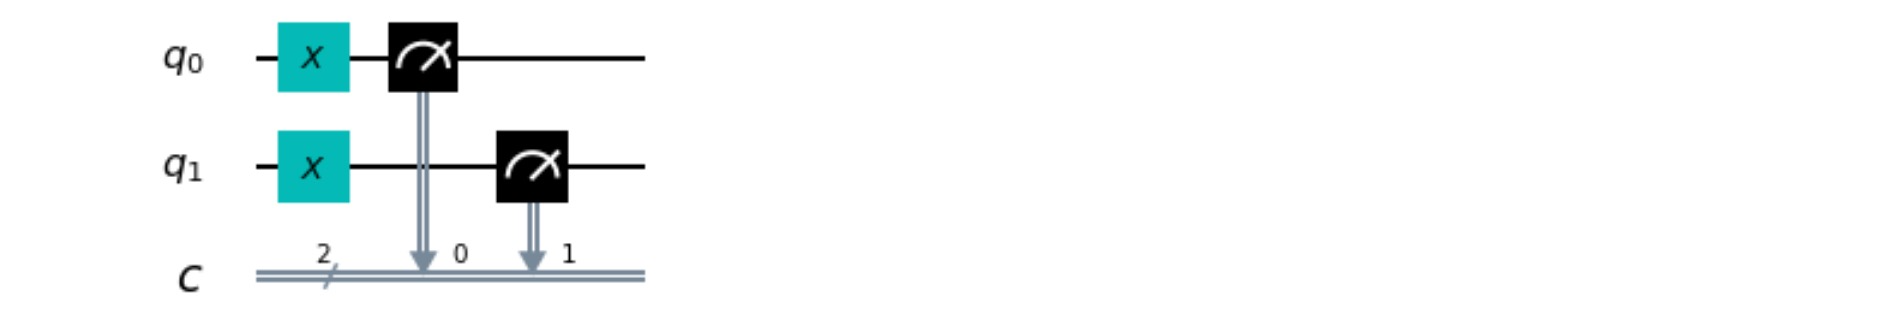

(2) $H|1\rangle \otimes H|1\rangle$

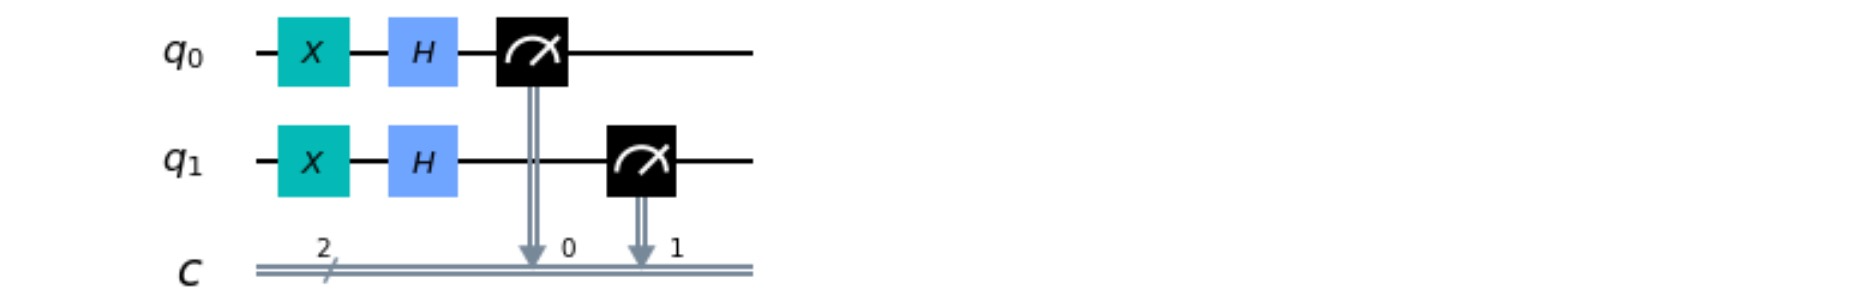